# Assignment 3

### Connecting to MySQL Using Connector

In [1]:
import mysql.connector
from mysql.connector import Error
from mysql.connector import errorcode

In [2]:
import pandas as pd
import csv
from beautifultable import BeautifulTable

### Using the username and password from MySQL database - "movie"

In [3]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


### Drop tables if exists and Creating tables in movie database and adding data into those tables:

### 1. MOVIES

##### Dropping table if exists

In [15]:
cur.execute("""drop table if exists movies;""")

##### Creating  table

In [16]:
cur.execute(
   """CREATE TABLE movies (
    movie    VARCHAR (100) PRIMARY KEY,
    budget   INT (100),
    company  VARCHAR (100),
    country  VARCHAR (100),
    genre    VARCHAR (100),
    rating   VARCHAR (100),
    score    INT (11),
    actor    VARCHAR (100),
    writer   VARCHAR (100),
    year     INT (11),
    director VARCHAR (100)
    );"""
)


##### Adding data to the table

In [17]:
with open('./movie_final.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['movie'], i['budget'],i['company'],i['country'],i['genre'],i['rating'],i['score'],i['actor'],i['writer'],i['year'],i['director']) for i in dr]
    cur.executemany("INSERT INTO movies(movie,budget,company,country,genre,rating,score,actor,writer,year,director) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")    

Data added Successfully


### 2. DIRECTOR 

##### Dropping table if exists

In [18]:
cur.execute("""drop table if exists director;""")

##### Creating  table

In [19]:
cur.execute(
    """CREATE TABLE director (director_id INT(10) PRIMARY KEY, director VARCHAR (100),year INT (10),
    category VARCHAR (100))"""
) 

##### Adding data to the table

In [21]:
with open('./director_final.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['director_id'], i['director'], i['year'],i['category']) for i in dr]
    cur.executemany("INSERT INTO director(director_id,director,year, category) VALUES(%s,%s,%s,%s)",to_db)
print("Data added Successfully")

Data added Successfully


### 3. COMPANY

##### Dropping table if exists

In [22]:
cur.execute("""drop table if exists company;""")

##### Creating  table

In [23]:
cur.execute(
    """CREATE TABLE company (company_id INT(10) PRIMARY KEY, company VARCHAR (100),
    country VARCHAR (100),headquarter VARCHAR(100),established INT(10))"""
) 

##### Adding data to the table

In [60]:
#cur.execute("""truncate company;""")

In [25]:
with open('./company_final.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['company_id'], i['company'], i['country'],i['headquarters'],i['established']) for i in dr]
    cur.executemany("INSERT INTO company(company_id,company, country,headquarter, established) VALUES(%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")

Data added Successfully


### 4. INSTAGRAM ACTOR DATA 

##### Dropping table if exists

In [89]:
cur.execute("""drop table if exists insta_actor_data;""")

##### Creating  table

In [90]:
cur.execute(
    """ CREATE TABLE insta_actor_data (
    Actor     VARCHAR (100) PRIMARY KEY,
    InstaName VARCHAR (100),
    UserId    VARCHAR(100),
    Followers INT (11),
    Biography VARCHAR (200),
    Followees INT (11) 
    );"""
)

##### Adding data to the table

In [91]:
with open('./insta_df1.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['Actor'], i['InstaName'], i['UserID'],i['Followers'],i['Biography'],i['Followees']) for i in dr]
    cur.executemany("INSERT INTO insta_actor_data(Actor,InstaName,UserId,Followers, Biography,Followees) VALUES(%s,%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")

Data added Successfully


### 5. INSTAGRAM ACTOR POSTS

##### Dropping table if exists

In [54]:
cur.execute("""drop table if exists insta_actor_posts;""")

##### Creating  table

In [57]:
cur.execute(
    """ CREATE TABLE insta_actor_posts (
    userId   VARCHAR (100) PRIMARY KEY,
    hashtags VARCHAR (1000),
    post     VARCHAR (1000),
    date     DATETIME,
    likes    INT (11) 
    );"""
)

#### Adding data to the table

In [50]:
#cur.execute("""truncate insta_actor_posts;""")

#### Changing date format from MM/DD/YY H:M to YY-MM-DD H:M:S to insert into mysql database

In [43]:
insta_actor_posts = pd.read_csv('insta_df2.csv', encoding = "utf-8")
insta_actor_posts['Date'] = pd.to_datetime(insta_actor_posts['Date'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')
insta_actor_posts.columns = insta_actor_posts.columns.to_series().apply(lambda x: x.strip())

#### Filling NaN values with blank spaces

In [44]:
insta_actor_posts.Post = insta_actor_posts.Post.fillna('')
insta_actor_posts.to_csv("insta_actor_posts.csv",encoding='utf-8')

In [58]:
with open('./insta_actor_posts.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['UserID'], i['Hashtags'], i['Post'],i['Date'],i['Likes']) for i in dr]
    cur.executemany("INSERT INTO insta_actor_posts(userId,hashtags, post,date, likes) VALUES(%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")    

Data added Successfully


### 6. INSTAGRAM USER POSTS ON ACTORS

##### Dropping table if exists

In [59]:
cur.execute("""drop table if exists insta_user_posts;""")

##### Creating  table

In [60]:
cur.execute(
    """ CREATE TABLE insta_user_posts (
    usertag        VARCHAR(100) PRIMARY KEY,
    typename       VARCHAR (1000),
    owner_username VARCHAR (1000),
    caption        VARCHAR (10000) ,
    owner_id       VARCHAR (100),
    comments       INT(100),
    likes          INT(100),
    date           DATETIME
    );"""
)

##### Adding data to the table

#### Changing date format from MM/DD/YY H:M to YY-MM-DD H:M:S to insert into mysql database

In [45]:
insta_user_posts = pd.read_csv('insta_df3.csv', encoding = "utf-8")
insta_user_posts['Date'] = pd.to_datetime(insta_user_posts['Date'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')
insta_user_posts.columns = insta_user_posts.columns.to_series().apply(lambda x: x.strip())

#### Filling NaN values with blank spaces

In [46]:
insta_user_posts.caption = insta_user_posts.caption.fillna('')
insta_user_posts.to_csv("insta_user_posts.csv",encoding='utf-8')

In [65]:
with open('./insta_user_posts.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['hashtag'], i['typename'], i['owner_username'],i['caption'],i['owner_id'],i['comments'],
              i['Likes'],i['Date']) for i in dr]
    cur.executemany("INSERT INTO insta_user_posts(usertag,typename, owner_username,caption, owner_id,comments,likes,date) VALUES(%s,%s,%s,%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")    

Data added Successfully


### 7. ACTOR

##### Dropping table if exists

In [66]:
cur.execute("""drop table if exists actor;""")

##### Creating  table

In [68]:
cur.execute(
    """ CREATE TABLE actor (
    actor_id    INT(10) PRIMARY KEY,
    actor       VARCHAR (1000),
    year        INT(10),
    award_id    INT(10) ,
    award       VARCHAR (100),
    film        VARCHAR (100)
    );"""
)

##### Adding data to the table

In [72]:
with open('./actor_final.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['actor_id'], i['actor'], i['year'],i['award_id'],i['award'],i['film']) for i in dr]
    cur.executemany("INSERT INTO actor(actor_id,actor, year,award_id,award,film) VALUES(%s,%s,%s,%s,%s,%s)",to_db)
print("Data added Successfully")

Data added Successfully


### 8. TWITTER_DATA

##### Dropping table if exists

In [5]:
cur.execute("""drop table if exists twitter_data;""")

##### Creating  table

In [ ]:
cur.execute(
    """ CREATE TABLE twitter_data (
    username    VARCHAR(100) PRIMARY KEY,
    movie       VARCHAR(100),
    userid      VARCHAR (100),
    userfollowers INT,
    userpost    VARCHAR(100) ,
    userpostedTime timestamp,
    userRetweets   int,
    screenName VARCHAR(100)
    );"""
)

##### Adding data to the table

In [ ]:
with open('./Twitter_Data.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['UserName'], i['movie'], i['Userid'],i['TweetFollowers'],i['Tweet'],i['TweetTime'],i['Retweets'],i['ScreenName']) for i in dr]
    cur.executemany("INSERT INTO actor(username,movie,userid,userfollowers,userpost,userpostedTime,userRetweets,screenName) VALUES(%s,%s,%s,%s,%s,%s,%s,%s)",to_db)

### 9. TWITTER_USER

##### Dropping table if exists 

In [12]:
cur.execute("""drop table if exists Twitter_User_Data;""")

##### Creating  table 

In [ ]:
cur.execute(
    """ CREATE TABLE Twitter_User_Data
    ScreenName VARCHAR(100) PRIMARY KEY,
    UserTweets VARCHAR(1000),
    DateOfTweets DATETIME,
    TweetFollowers INT
    );"""
)

##### Adding data to the table

In [ ]:
with open('./Twitter_User_Data.csv','r', encoding='UTF-8') as fin:
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['ScreenName'], i['UserTweets'], i['DateOfTweets'],i['TweetFollowers']) for i in dr]
    cur.executemany("INSERT INTO actor(ScreenName,UserTweets,DateOfTweets,TweetFollowers) VALUES(%s,%s,%s,%s)",to_db)
print("Data added Successfully")

## Normalization

### ACTOR Table

### First normal form ( 1NF )

In [11]:
actors = pd.read_csv('actor_final.csv')
actors

,actor_id,actor,year,award_id,award,film
0,1,CLARK GABLE,1934,10,Actor,It Happened One Night
1,40,VICTOR MCLAGLEN,1935,10,Actor,The Informer
2,689,PAUL LUKAS,1943,10,Actor,Watch on the Rhine
3,807,BING CROSBY,1944,10,Actor,Going My Way
4,910,RAY MILLAND,1945,10,Actor,The Lost Weekend
5,1216,BRODERICK CRAWFORD,1949,10,Actor,All the King's Men
6,1654,ERNEST BORGNINE,1955,10,Actor,Marty
7,1723,YUL BRYNNER,1956,10,Actor,The King and I
8,1857,DAVID NIVEN,1958,10,Actor,Separate Tables
9,1921,CHARLTON HESTON,1959,10,Actor,Ben-Hur


* Actor table has a primary key "actor_id".
* The values in each column of the table are atomic. There are No multi-value attributes.
* Therefore First normal form is satisfied.

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* There is no calculated data

* From the above table - year, film are completely dependant on Compostie primary key "actor_id" and "award_id"
* "actor" is dependent on only actor_id which shows partial dependency. 
* So seperating actors from the main table by creating actor_details with actor_id, actor as below.
* creating procedures to insert data into above two tables.


##### Actor details Table is created using Stored procedures and inserting data into table by calling the procedure.

In [60]:
cur.execute("drop table if exists actor_details;")

* Creating Table actor_details with actor id and actor

In [61]:
cur.execute("create table actor_details(actor_id int PRIMARY KEY, actor varchar(100));") 
print("Table created Successfully")

Table created Successfully


* Stored Procedure to insert or update data in table and getting the count of records inserted

In [69]:
cur.execute("""CREATE PROCEDURE `actor_insert`(
in insert_update varchar(100),
out records_count int(10)
)
BEGIN 
if insert_update = 'insert' 
then  
insert into actor_details(actor_id,actor) 
select a.actor_id,a.actor from movie.actor as a LEFT JOIN  
actor_details as b on b.actor_id; 
set records_count = (select count(actor_id) from actor_details); 
elseif insert_update = 'update' 
then 
UPDATE actor_details SET actor = (SELECT actor_id, actor FROM movie.actor WHERE actor.actor_id = actor_details.actor_id); 
set records_count = (select count(actor_id) from actor_details); 
else set records_count = 0; 
end if; 
END""")
print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


* Inserting data into actor_details using procedure call

In [70]:
cur.execute("""call actor_insert("insert",@count);""")

Count of rows inserted into the tables

In [71]:
cur.execute("select @count;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count of Data"]
for row in rows:
    table.append_row(row)
print(table)

+---------------+
| Count of Data |
+---------------+
|      942      |
+---------------+


In [52]:
cur.execute("select * from movie.actor_details;") 
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["actor_id","actor"]
for row in rows:
    table.append_row(row)
print(table)

+----------+-----------------------------------------------+
| actor_id |                     actor                     |
+----------+-----------------------------------------------+
|    1     |                  CLARK GABLE                  |
+----------+-----------------------------------------------+
|    4     |               CLAUDETTE COLBERT               |
+----------+-----------------------------------------------+
|    9     |               THE MERRY WIDOW                 |
+----------+-----------------------------------------------+
|    12    |                 VIVA VILLA!                   |
+----------+-----------------------------------------------+
|    14    |            IT HAPPENED ONE NIGHT              |
+----------+-----------------------------------------------+
|    17    |                    ESKIMO                     |
+----------+-----------------------------------------------+
|    20    |   THE CONTINENTAL"" FROM THE GAY DIVORCEE""   |
+----------+------------

* Now dropping column from main table actor

In [ ]:
cur.execute("ALTER TABLE movie.actor DROP COLUMN actor;")

In [51]:
cur.execute("select * from movie.actor;") 
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["actor_id","year","award_id ","award","film"]
for row in rows:
    table.append_row(row)
print(table)

+----------+------+-----------+----------------------+-------------------------+
| actor_id | year | award_id  |        award         |          film           |
+----------+------+-----------+----------------------+-------------------------+
|    1     | 1934 |    10     |        Actor         |  It Happened One Night  |
+----------+------+-----------+----------------------+-------------------------+
|    4     | 1934 |    13     |       Actress        |  It Happened One Night  |
+----------+------+-----------+----------------------+-------------------------+
|    9     | 1934 |    17     |    Art Direction     | Cedric Gibbons, Fredric |
|          |      |           |                      |           Hope          |
+----------+------+-----------+----------------------+-------------------------+
|    12    | 1934 |    20     |  Assistant Director  |       John Waters       |
+----------+------+-----------+----------------------+-------------------------+
|    14    | 1934 |    31   

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Transitive Dependency:
    * In this table actor_id determines award_id,year,film and award. Therefore,  actor_id determines award via award_id and there is transitive functional dependency, and this structure does not satisfy third normal form.
    * So creating a table for award details with award_id and award.

* Creating Table award_details with award id and award category

In [5]:
cur.execute("drop table if exists award_details;")

In [6]:
cur.execute("create table award_details(award_id int PRIMARY KEY, award varchar(100));") 
print("Table created Successfully")

Table created Successfully


* Stored Procedure to insert or update data in table and getting the count of records inserted

In [7]:
cur.execute("""CREATE PROCEDURE `actor_award_insert`(
in insert_update varchar(100),
out records_count int(10)
)
BEGIN

if insert_update = "insert"
then 
insert into award_details(award_id,award) 
select distinct a.award_id,a.award from actor as a LEFT JOIN 
award_details as b on b.award_id;
set records_count = (select count(award_id) from award_details);

elseif insert_update = "update"
then

UPDATE award_details SET award =
(SELECT distinct award_id, award FROM award_details 
WHERE actor.award_id = award_details.acaward_id); 

set records_count = (select count(award_id) from award_details);

else set records_count = 0;

end if;

END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


* Inserting data into award_details details using procedure call

In [8]:
cur.execute("""call actor_award_insert("insert",@count);""")

Count of rows inserted into the tables

In [9]:
cur.execute("select @count;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count of Data"]
for row in rows:
    table.append_row(row)
print(table)

+---------------+
| Count of Data |
+---------------+
|      68       |
+---------------+


Removing award column from actor table

In [10]:
cur.execute("ALTER TABLE movie.actor DROP COLUMN award;")

In [12]:
cur.execute("select * from movie.actor;") 
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["actor_id","year","award_id ","film"]
for row in rows:
    table.append_row(row)
print(table)

+----------+------+-----------+-----------------------------------------------+
| actor_id | year | award_id  |                     film                      |
+----------+------+-----------+-----------------------------------------------+
|    1     | 1934 |    10     |             It Happened One Night             |
+----------+------+-----------+-----------------------------------------------+
|    4     | 1934 |    13     |             It Happened One Night             |
+----------+------+-----------+-----------------------------------------------+
|    9     | 1934 |    17     |         Cedric Gibbons, Fredric Hope          |
+----------+------+-----------+-----------------------------------------------+
|    12    | 1934 |    20     |                  John Waters                  |
+----------+------+-----------+-----------------------------------------------+
|    14    | 1934 |    31     |                  Frank Capra                  |
+----------+------+-----------+---------

## DIRECTOR Table

In [39]:
director = pd.read_csv('director_final.csv')
director

,director_id,director,year,category
0,0,AKI KAURISMÄKI,2004,ACCEC Award
1,88,ALLISON ANDERS,2013,Primetime Emmy
2,103,STEPHEN HOPKINS,2005,Primetime Emmy
3,117,TIMO NOVOTNY,1998,Diagonale Youth Jury Award - Honorable Mention
4,122,MARC MEYER,2009,Primetime Emmy
5,134,GEORGE LUCAS,1992,Irving G. Thalberg Memorial Award
6,218,ANDREW STANTON,2011,Oscar
7,312,SAM MENDES,2000,Oscar
8,375,ORSON WELLES,1971,Honorary Award
9,412,LARS VON TRIER,2001,Oscar


### First Normal Form ( 1NF )

* This table has a Primary key - "director_id".
* The values in each column of the table are atomic.
* All the columns director , year and category contain different information.So there are no repeating groups.

* Therefore the table is in First normal form

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns director,year and category are fully functional dependent on the primary key. 
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "director_id" determines attributes director, year, category directly. There is no transitive dependency.
* Therefore the table is in third normal form.

## COMPANY Table

In [40]:
company = pd.read_csv('company_final.csv')
company

,company_id,company,country,headquarters,established
0,0,40 ACRES AND A MULE FILMWORKS,United States,"New York City,Â New York",1986
1,1,606 FILMS,United States,"Los Angeles,Â California",2014
2,2,2929 PRODUCTIONS,United States,"Dallas,Â Texas",2003
3,3,ALLIED ARTISTS PICTURES CORPORATION,United States,"Los Angeles,Â California",1931
4,4,AMBLIN ENTERTAINMENT,United States,"Universal City,Â California",1981
5,5,AMERICAN INTERNATIONAL PICTURES,United States,"Los Angeles,Â California",1956
6,6,AMERICAN ZOETROPE,United States,"San Francisco,Â California",1969
7,7,ARTISAN ENTERTAINMENT,United States,"New York City,Â New York",1982
8,8,BATJAC PRODUCTIONS,United States,"Los Angeles,Â California",1952
9,9,BLINDING EDGE PICTURES,United States,"Berwyn,Â Pennsylvania",2000


### First Normal Form ( 1NF )

* This table has a Primary key - "company_id".
* The values in each column of the table are atomic.
* All the columns company , company_id contain different information.So there are no repeating groups.

* Therefore the table is in First normal form

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns country,established and headquarters are fully functional dependent on the primary key. 
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "company","company_id" determines attributes country, headquarters, established directly. There is no transitive dependency.
* Theerefore the table is in thire normal form.

## INSTAGRAM_ACTOR_DATA Table

In [41]:
insta_actor_data = pd.read_csv('insta_df1.csv')
insta_actor_data

,Actor,InstaName,UserID,Followers,Biography,Followees
0,James Caan CBE,jamescaanonline,1696526648,4717,"Serial Entrepreneur, CEO of Hamilton Bradshaw,...",818
1,Tom Cruise,tomcruise,6970394928,3002472,Actor. Producer. Running in movies since 1981.,33
2,Eddie Murphy,eddiemurphyofficial,1163672727,21519,Twitter @eddiemurphy Facebook @eddiemurphy,38
3,Kevin Costner & Modern West,kevincostnermodernwest,489562384,218441,NaN,97
4,Will Smith,willsmith,3132929984,28360949,New playground. Same kid from West Philly.⁣\r\...,141
5,Robert Redford,robertredford_official,4107113884,3091,Hollywood Actor,8
6,Keira Knightley Fanpage,keira_knightley_,258476862,173134,Fanpage for the Oscar nominated actress Keira ...,32
7,Sigourney Weaver 󾓦,official_sigourneyweaver,5683684566,2195,Actress and nature protector. \r\nIf you can d...,33
8,Anthony Hopkins,anthonyhopkins,3987356991,1146150,"Artist, Painter, Composer, Actor of film, stag...",7
9,Ralph Fiennes,ralphfiennesweb,7486798414,6129,🔸Ralph Nathaniel Twisleton-Wykeham-Fiennes\r\n...,41


### First Normal Form ( 1NF )

* This table has a Primary key - "Actor".
* The values in each column of the table are atomic.
* All the columns InstaName , UserID, Followers, Biography and Followees contain different information.So there are no repeating groups.

* Therefore the table is in First normal form

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns InstaName , UserID, Followers, Biography and Followees are fully functional dependent on the primary key. 
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "Actor" determines attributes InstaName , UserID, Followers, Biography and Followees directly. There is no transitive dependency.
* Therefore the table is in third normal form.

## INSTAGRAM_ACTOR_POSTS Table

In [47]:
insta_actor_posts = pd.read_csv('insta_actor_posts.csv')
insta_actor_posts

,Unnamed: 0,UserID,Hashtags,Post,Date,Likes
0,0,1696526648,[],Excited and thrilled to be speaking at the Awa...,2019-03-05 14:01:00,59
1,1,6970394928,[],Summer 2021 and Summer 2022,2019-01-15 00:24:00,254898
2,2,1163672727,[],NaN,2014-03-09 20:26:00,2921
3,3,489562384,"['kevincostner', 'moviemaking', 'film', 'filmm...",Behind the scenes - movie making.\r\r\r\nFrom ...,2019-03-05 22:55:00,13553
4,4,3132929984,[],Episode 2 of @willsmithsbucketlist is Out Now!...,2019-03-06 17:24:00,469558
5,5,258476862,[],Keira Knightley in “The Aftermath”,2019-02-28 21:02:00,10035
6,6,5683684566,"['yaleuniversity', 'yale', 'sigourneyweaver']",At Yale. -old picture... :) #yaleuniversity \r...,2019-02-27 18:42:00,330
7,7,3987356991,"['sebastienizambard', 'ildivo', 'brendanieto']",Magnificent breakfast with magnificent people....,2019-03-02 18:10:00,59483
8,8,7486798414,['tbt'],#tbt Photo by @davidhitchensphotography,2019-03-06 23:05:00,71
9,9,7066457325,"['zhangziyi', '章子怡', '妻子的浪漫旅行']",Spotted. Ziyi and her husband Wang Feng walkin...,2019-03-04 04:03:00,463


### First Normal Form ( 1NF )

* This table has a Primary key - "UserID".
* The values in each column of the table are atomic.
* All the columns UserID,Hashtags,Post,Date,Likes contain different information.So there are no repeating groups.

* Therefore the table is in First normal form

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns Hashtags,Post,Date,Likes are fully functional dependent on the primary key UserID. 
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "UserID" determines attributes UserID,Hashtags,Post,Date,Likes There is no transitive dependency.
* Therefore the table is in third normal form.

## INSTAGRAM_USER_POSTS Table

In [48]:
insta_user_posts = pd.read_csv('insta_user_posts.csv')
insta_user_posts

,Unnamed: 0,hashtag,typename,owner_username,caption,owner_id,comments,Likes,Date
0,0,jamescaanonline,GraphImage,blochamok,In the office getting my cue-cards ready! - On...,345293215,2,38,2019-02-28 14:02:00
1,1,tomcruise,GraphImage,akshayfanclub,@akshaykumar sir clicked with @nitarabhambhani...,1932711085,3,106,2019-03-07 07:18:00
2,2,eddiemurphyofficial,GraphImage,johnsimonephotography,NaN,4469816354,3,3,2019-02-11 08:57:00
3,3,kevincostnermodernwest,GraphImage,elke_spang,#kevincostner #kevinmichaelcostner #kevincostn...,1943713251,5,93,2019-03-07 00:00:00
4,4,willsmith,GraphImage,actionindustries,According to Variety Idris Elba is being scope...,11078902795,0,2,2019-03-07 07:27:00
5,5,keira_knightley_,GraphImage,_super_kostya_,Looks like?!😜🤘🏻 #johnnydeppofficial #keira_kni...,495714438,1,22,2019-02-23 20:27:00
6,6,official_sigourneyweaver,GraphImage,scaladimario,Ripley in Alien #official_sigourneyweaver #dig...,24972729,4,101,2018-12-17 09:34:00
7,7,anthonyhopkins,GraphImage,cinefilodefortaleza,Terra das Sombras (1993).\r\r\nDir: Richard At...,9379356033,0,2,2019-03-07 06:41:00
8,8,ralphfiennesweb,GraphImage,ralphfiennesweb,#Repost @restoran_bela_reka (@get_repost)\r\r\...,7486798414,0,83,2019-02-24 22:04:00
9,9,zhangziyi_official,GraphImage,beyond.seen.screen,😁🎥🎬📲⠀\r\r\nThis film is a sequel to Godzilla (...,4274574033,0,13,2018-12-14 11:33:00


### First Normal Form ( 1NF )

* This table has a Primary key - "hashtag".
* The values in each column of the table are atomic.
* All the columns typename,owner_username,caption,owner_id,comments,Likes,Date contain different information.So there are no repeating groups.

* Therefore the table is in First normal form

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns typename,owner_username,caption,owner_id,comments,Likes,Date are fully functional dependent on the primary key. 
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "hashtag" determines attributes typename,owner_username,caption,owner_id,comments,Likes,Date directly. There is no transitive dependency.
* Therefore the table is in third normal form.

## TWITTER_DATA Table 

In [5]:
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data

,Unnamed: 0,UserName,movie,Userid,TweetFollowers,Tweet,TweetTime,Retweets,ScreenName
0,0,DC,STAND BY ME,1110078422586396672,99,"@tf_mathew Gotta give your phone up, gotta sho...",2019-03-25 07:18:14,0,DavidDC5
1,12,André,FERRIS BUELLER'S DAY OFF,1110027999175282689,263,@ferretbuellertx @stickermule I wore my ferret...,2019-03-25 03:57:52,0,black_emo_guy
2,19,Wyn O. C.🐋,TOP GUN,1110077120200347648,836,RT @Well_Regulated_: A member of our well regu...,2019-03-25 07:13:04,21,wyn_o
3,34,Quinnbwinglin,ALIENS,1110078444799447041,345,RT @JotSandhuArt: I think aliens avoid earth t...,2019-03-25 07:18:20,7,quinnbwinglin
4,46,Wüste Sachen,FLIGHT OF THE NAVIGATOR,1110050112896667648,32,@discolando Flight of the Navigator - that was...,2019-03-25 05:25:45,0,ourean
5,61,Ricky,PLATOON,1110077186780753922,140,My new platoon consists of Star Wars geeks and...,2019-03-25 07:13:20,0,Ricky12012
6,75,Antxiko,LABYRINTH,1110078446942732289,1424,RT @microcomputador: I am making a Maze Game f...,2019-03-25 07:18:20,4,antxiko
7,90,$HY L3NN0x,BLUE VELVET,1110078087969103873,752,RT @ChrisCat_Bar: *cues @shylennox’s Blue Velv...,2019-03-25 07:16:55,1,shylennox
8,102,HoneyDrop9,PRETTY IN PINK,1110077929063624704,10,@Iron_Klaus Omg Yuzu I don’t like Pink toooo *...,2019-03-25 07:16:17,0,Macchiato_13
9,111,AnnaskiDV,THE FLY,1110078402663337984,42,RT @kz_anika: @KZofficial singing Yellow has t...,2019-03-25 07:18:10,1,AnnaskiDv


### First Normal Form ( 1NF )

* This table has a Primary key - "screenname".
* The values in each column of the table are atomic.
* All the columns dateoftweets , tweets , followers contain different information.So there are no repeating groups.

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns dateoftweets,tweets ,followers are fully functional dependent on the primary key.
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF )

* All requirements for 2nd NF are met.
* Primary key "screenname" determines all the present attributes directly. There is no transitive dependency.
* Therefore the table is in third normal form.

## TWITTER_USER_DATA Table

In [6]:
twitter_user_data = pd.read_csv('Twitter_User_Data.csv')
twitter_user_data

,Unnamed: 0,ScreenName,UserTweets,DateOfTweets,TweetFollowers
0,0,MagpiesView,RT @Rachael_Swindon: *Insert utter disgust inc...,2019-03-06 20:25:04,5236
1,20,KenBoon79,@DarcieRead Im angry now and it's all because ...,2019-03-06 21:14:07,379
2,40,Fran_Neena20409,RT @PSG_inside: 📸⚽️🎮||Quand @neymarjr reçoit @...,2019-03-06 21:24:39,3122
3,60,LJohn_57,"RT @beth2_k3a: Check ""Yes"" and RT if you hate ...",2019-03-06 20:10:00,2647
4,80,dose_hiphop,Ranking Childish Gambino’s ‘Because the Intern...,2019-03-06 18:24:59,49
5,100,TalkingPicsTV,23:00 JUNIOR BONNER (1972) adventure #SteveMcQ...,2019-03-06 21:00:34,24182
6,120,graphicsullivan,Check out my Labyrinth movie poster that I des...,2019-03-06 19:57:48,0
7,128,lenawaters_,RT @Hogwartssite: - ¿Hacemos una maratón de Ha...,2019-03-06 21:22:43,2871
8,148,Mile_by_Mile,RT @NBCNews: President Trump will no longer re...,2019-03-06 20:01:16,3270
9,168,notrightbob,RT @AP: Sen. Martha McSally| the first female ...,2019-03-06 20:00:29,124


### First Normal Form ( 1NF )

* This table has a Primary key - "screenname".
* The values in each column of the table are atomic.
* All the columns dateoftweets , tweets , followers contain different information.So there are no repeating groups.

### Second Normal Form ( 2NF )

* All requirements for 1st NF are met.
* Columns dateoftweets,tweets ,followers are fully functional dependent on the primary key.
* There is no calculated data
* Therefore the table is in second normal form.

### Third Normal Form ( 3NF ) 

* All requirements for 2nd NF are met.
* Primary key "screenname" determines all the present attributes directly. There is no transitive dependency.
* Therefore the table is in third normal form.

## MOVIE Table

In [20]:
movie = pd.read_csv('movie_final.csv')
movie

,Unnamed: 0,movie,budget,company,country,genre,rating,score,actor,writer,year,director
0,0,STAND BY ME,8000000,COLUMBIA PICTURES CORPORATION,USA,Adventure,R,8.1,WIL WHEATON,Stephen King,1986,ROB REINER
1,1,FERRIS BUELLER'S DAY OFF,6000000,PARAMOUNT PICTURES,USA,Comedy,PG-13,7.8,MATTHEW BRODERICK,John Hughes,1986,JOHN HUGHES
2,2,TOP GUN,15000000,PARAMOUNT PICTURES,USA,Action,PG,6.9,TOM CRUISE,Jim Cash,1986,TONY SCOTT
3,3,ALIENS,18500000,TWENTIETH CENTURY FOX FILM CORPORATION,USA,Action,R,8.4,SIGOURNEY WEAVER,James Cameron,1986,JAMES CAMERON
4,4,FLIGHT OF THE NAVIGATOR,9000000,WALT DISNEY PICTURES,USA,Adventure,PG,6.9,JOEY CRAMER,Mark H. Baker,1986,RANDAL KLEISER
5,5,PLATOON,6000000,HEMDALE,UK,Drama,R,8.1,CHARLIE SHEEN,Oliver Stone,1986,OLIVER STONE
6,6,LABYRINTH,25000000,HENSON ASSOCIATES (HA),UK,Adventure,PG,7.4,DAVID BOWIE,Dennis Lee,1986,JIM HENSON
7,7,BLUE VELVET,6000000,DE LAURENTIIS ENTERTAINMENT GROUP (DEG),USA,Drama,R,7.8,ISABELLA ROSSELLINI,David Lynch,1986,DAVID LYNCH
8,8,PRETTY IN PINK,9000000,PARAMOUNT PICTURES,USA,Comedy,PG-13,6.8,MOLLY RINGWALD,John Hughes,1986,HOWARD DEUTCH
9,9,THE FLY,15000000,SLM PRODUCTION GROUP,USA,Drama,R,7.5,JEFF GOLDBLUM,George Langelaan,1986,DAVID CRONENBERG


## First normal form (1NF)

* This table has a primary key "movie" and foreign keys - director,actor and company

* The values in each column of a table are atomic.

* All columns have different data which is not dependant on other columns in the table. There are no repeating groups

* Movie table is in  first normal form.

## Second normal form (2NF)

* All requirements for 1st NF are met.
* All the columns in this table are fully dependant on primary key "movie".Therefore no partial dependancy.
* There is no calculated data.
* The table is in second normal foem

## Third normal form (2NF)

* All requirements for 2nd NF are met.
* Primary key "movie" determines all other attributesint the table directly. There is no transitive dependency.
* Therefore the table is in third normal form.

# Views

#### 1. Each Award count in the year 2000

In [81]:
cur.execute("""create view award_count as
select a.award_id,a.award,count(*) as count,b.year from movie.award_details as a,movie.actor as b where b.year =2000
group by a.award;""")
print("View created successfully")

View created successfully


#### 2. All movies under company - WALT DISNEY PICTURES between years 2000 and 2005

In [82]:
cur.execute("""create view movie_year as
select movie,year from movie.movies where company = 'WALT DISNEY PICTURES' and year between 2000 and 2005;""")
print("View created successfully")


View created successfully


#### 3. Popular actor in instagram based on followers and movies he acted 

In [96]:
cur.execute("""create view popular_actor_insta as
select a.Actor,a.InstaName,a.Followers,m.movie from movie.insta_actor_data as a,movie.movies as m
where m.actor = a.Actor order by a.Followers desc limit 20;""")
print("View created successfully")

View created successfully


#### 4. All movies under company - WALT DISNEY PICTURES in the year 2015

In [99]:
cur.execute("""create view movie_company as
select movie,year_ from movie.movies where 
company = 'WALT DISNEY PICTURES' and year_ = 2015;""")
print("View created successfully")

View created successfully


#### 5. All companies that the actor has worked with

In [101]:
cur.execute("""create view actor_company as
select c.company,c.established from company as c,actor_details as a where a.actor = 'CLARK GABLE';""")
print("View created successfully")

View created successfully


## Views (Twitter)

#### 1. Get the users who posted is least popular.

In [ ]:
#queried based users who posted is least popular.
cur.execute("""create view min_tweet1 as select min(TweetFollowers) from twitter_user_data;""")

#### 2. Which less budget movie genre was the director awarded an award for

In [ ]:
#queried for director's award for directing with less budget
cur.execute("""create view director_award1 as select d.category, m.genre, min(m.budget) FROM director d INNER JOIN movie m ON m.director = d.director where m.budget<35000000 and m.budget>0;
""")

#### 3. Which is the oldest movie producing company and what is the number of movies produced by them

In [ ]:
#queried for oldest movie producing company
cur.execute("""create view movie_old as select min(a.established),a.company,count(b.movie) from company a, movie b where a.company=b.company;""")

#### 4. Which is the movie the actor was awarded with the award Writing (Screenplay Based on Material from Another Medium

In [ ]:
#queried for movie where actor was awarded
cur.execute("""create view movie_rating1 as select distinct rating from movie where movie = (select min(Film) from actor_final where Award='Writing (Screenplay Based on Material from Another Medium)');""")

#### 5. Retreiving tweets for a particular screen name

In [ ]:
#queried for Retreiving tweets for a particular screen name
cur.execute("""create view user_post as select distinct UserTweets from twitter_user_data where ScreenName = 'aigis_txt';""")

## INDEXES

#### 1.  Get all directors who  won a particular  award category with index on award caregory.

In [27]:
cur.execute("drop index director_index on director;")

In [28]:
cur.execute("""explain select * from movie.director where category = "Best Film";""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+--------+------+-------+----+-------+----+-----+----+----+-----+---------+
| id | select | tabl | parti | ty | possi | ke | key | re | ro | fil |  Extra  |
|    | _type  |  e   | tions | pe | ble_k | y  | _le | f  | ws | ter |         |
|    |        |      |       |    |  eys  |    |  n  |    |    | ed  |         |
+----+--------+------+-------+----+-------+----+-----+----+----+-----+---------+
| 1  | SIMPLE | dire | None  | AL | None  | No | Non | No | 28 | 10. | Using w |
|    |        | ctor |       | L  |       | ne |  e  | ne | 62 |  0  |  here   |
|    |        |      |       |    |       |    |     |    | 8  |     |         |
+----+--------+------+-------+----+-------+----+-----+----+----+-----+---------+


In [29]:
cur.execute("""create index director_index on director(category);""")

In [30]:
cur.execute("""explain select * from movie.director where category = "Best Film";""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+-------+------+--------+----+-------+---------+-----+----+----+-----+----+
| id | selec | tabl | partit | ty | possi |   key   | key | re | ro | fil | Ex |
|    | t_typ |  e   |  ions  | pe | ble_k |         | _le | f  | ws | ter | tr |
|    |   e   |      |        |    |  eys  |         |  n  |    |    | ed  | a  |
+----+-------+------+--------+----+-------+---------+-----+----+----+-----+----+
| 1  | SIMPL | dire |  None  | re | direc | directo | 403 | co | 28 | 100 | No |
|    |   E   | ctor |        | f  | tor_i | r_index |     | ns | 9  | .0  | ne |
|    |       |      |        |    | ndex  |         |     | t  |    |     |    |
+----+-------+------+--------+----+-------+---------+-----+----+----+-----+----+


* The new director_index index was considered and used, and the query scanned 289 rows instead of 2862.
* Therefore the query execution is improved. 

#### 2. Index on Actors - get actor starting with "Van"

In [61]:
cur.execute("""drop index actor_index on actor_details;""")

In [62]:
cur.execute("explain select * from actor_details where actor like 'Dav%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+-------+--------+-------+----+---------+----+-----+----+----+-----+------+
| id | selec | table  | parti | ty | possibl | ke | key | re | ro | fil | Extr |
|    | t_typ |        | tions | pe | e_keys  | y  | _le | f  | ws | ter |  a   |
|    |   e   |        |       |    |         |    |  n  |    |    | ed  |      |
+----+-------+--------+-------+----+---------+----+-----+----+----+-----+------+
| 1  | SIMPL | actor_ | None  | AL |  None   | No | Non | No | 94 | 11. | Usin |
|    |   E   | detail |       | L  |         | ne |  e  | ne | 2  | 11  | g wh |
|    |       |   s    |       |    |         |    |     |    |    |     | ere  |
+----+-------+--------+-------+----+---------+----+-----+----+----+-----+------+


In [63]:
cur.execute("""create index actor_index on actor_details(actor);""")

In [64]:
cur.execute("explain select * from actor_details where actor like 'Dav%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+------+-------+------+------+------+------+----+---+---+-----+-----------+
| id | sele | table | part | type | poss | key  | ke | r | r | fil |   Extra   |
|    | ct_t |       | itio |      | ible |      | y_ | e | o | ter |           |
|    | ype  |       |  ns  |      | _key |      | le | f | w | ed  |           |
|    |      |       |      |      |  s   |      | n  |   | s |     |           |
+----+------+-------+------+------+------+------+----+---+---+-----+-----------+
| 1  | SIMP | actor | None | rang | acto | acto | 40 | N | 8 | 100 | Using whe |
|    |  LE  | _deta |      |  e   | r_in | r_in | 3  | o |   | .0  | re; Using |
|    |      |  ils  |      |      | dex  | dex  |    | n |   |     |   index   |
|    |      |       |      |      |      |      |    | e |   |     |           |
+----+------+-------+------+------+------+------+----+---+---+-----+-----------+


* The new actor_index index was considered and used, and the query scanned 8 rows instead of 942.
* Therefore the query execution is improved. 

#### 3. Index on genre in movies table - get all movies under "Comedy" genre

In [36]:
cur.execute("drop index genre_index on movies;")

In [37]:
cur.execute("explain select * from movies where genre = 'Comedy';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+
| id | selec | tab | parti | typ | possible | ke | key | re | ro | fil | Extra |
|    | t_typ | le  | tions |  e  |  _keys   | y  | _le | f  | ws | ter |       |
|    |   e   |     |       |     |          |    |  n  |    |    | ed  |       |
+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+
| 1  | SIMPL | mov | None  | ALL |   None   | No | Non | No | 67 | 10. | Using |
|    |   E   | ies |       |     |          | ne |  e  | ne | 82 |  0  |  wher |
|    |       |     |       |     |          |    |     |    |    |     |   e   |
+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+


In [38]:
cur.execute("create index genre_index on movies(genre);")

In [39]:
cur.execute("explain select * from movies where genre = 'Comedy';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+--------+------+-------+----+-------+---------+-----+----+----+-----+----+
| id | select | tabl | parti | ty | possi |   key   | key | re | ro | fil | Ex |
|    | _type  |  e   | tions | pe | ble_k |         | _le | f  | ws | ter | tr |
|    |        |      |       |    |  eys  |         |  n  |    |    | ed  | a  |
+----+--------+------+-------+----+-------+---------+-----+----+----+-----+----+
| 1  | SIMPLE | movi | None  | re | genre | genre_i | 403 | co | 20 | 100 | No |
|    |        |  es  |       | f  | _inde |  ndex   |     | ns | 62 | .0  | ne |
|    |        |      |       |    |   x   |         |     | t  |    |     |    |
+----+--------+------+-------+----+-------+---------+-----+----+----+-----+----+


* The new genre_index index was considered and used, and the query scanned 2062 rows instead of 6782.
* Therefore the query execution is improved. 

#### 4. Index on typename in insta_user_posts table - get all posts under "GraphImage" typename

In [40]:
cur.execute("drop index posts_index on insta_user_posts;")

In [41]:
cur.execute("explain select * from insta_user_posts where typename = 'GraphImage';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+------+----------+-------+-----+-------+----+-----+----+----+-----+------+
| id | sele |  table   | parti | typ | possi | ke | key | re | ro | fil | Extr |
|    | ct_t |          | tions |  e  | ble_k | y  | _le | f  | ws | ter |  a   |
|    | ype  |          |       |     |  eys  |    |  n  |    |    | ed  |      |
+----+------+----------+-------+-----+-------+----+-----+----+----+-----+------+
| 1  | SIMP | insta_us | None  | ALL | None  | No | Non | No | 27 | 10. | Usin |
|    |  LE  | er_posts |       |     |       | ne |  e  | ne |    |  0  | g wh |
|    |      |          |       |     |       |    |     |    |    |     | ere  |
+----+------+----------+-------+-----+-------+----+-----+----+----+-----+------+


In [42]:
cur.execute("create index posts_index on insta_user_posts(typename(50));")

In [43]:
cur.execute("explain select * from insta_user_posts where typename = 'GraphImage';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+------+----------+------+----+-------+------+-----+----+----+-----+------+
| id | sele |  table   | part | ty | possi | key  | key | re | ro | fil | Extr |
|    | ct_t |          | itio | pe | ble_k |      | _le | f  | ws | ter |  a   |
|    | ype  |          |  ns  |    |  eys  |      |  n  |    |    | ed  |      |
+----+------+----------+------+----+-------+------+-----+----+----+-----+------+
| 1  | SIMP | insta_us | None | re | posts | post | 203 | co | 22 | 100 | Usin |
|    |  LE  | er_posts |      | f  | _inde | s_in |     | ns |    | .0  | g wh |
|    |      |          |      |    |   x   | dex  |     | t  |    |     | ere  |
+----+------+----------+------+----+-------+------+-----+----+----+-----+------+


* The new posts_index index was considered and used, and the query scanned 22 rows instead of 27.
* Therefore the query execution is improved. 

#### 5. Index on headquarters in company table - get all company details in "NEW YORK" headquarters

In [44]:
cur.execute("drop index headquarter_index on company;")

In [45]:
cur.execute("explain  select * from movie.company where headquarter like 'NEW%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+
| id | selec | tab | parti | typ | possible | ke | key | re | ro | fil | Extra |
|    | t_typ | le  | tions |  e  |  _keys   | y  | _le | f  | ws | ter |       |
|    |   e   |     |       |     |          |    |  n  |    |    | ed  |       |
+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+
| 1  | SIMPL | com | None  | ALL |   None   | No | Non | No | 15 | 11. | Using |
|    |   E   | pan |       |     |          | ne |  e  | ne | 1  | 11  |  wher |
|    |       |  y  |       |     |          |    |     |    |    |     |   e   |
+----+-------+-----+-------+-----+----------+----+-----+----+----+-----+-------+


In [46]:
cur.execute("create index headquarter_index on company(headquarter);")

In [47]:
cur.execute("explain  select * from movie.company where headquarter like 'NEW%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

+----+------+----+------+-----+--------+-------+----+---+---+-----+------------+
| id | sele | ta | part | typ | possib |  key  | ke | r | r | fil |   Extra    |
|    | ct_t | bl | itio |  e  | le_key |       | y_ | e | o | ter |            |
|    | ype  | e  |  ns  |     |   s    |       | le | f | w | ed  |            |
|    |      |    |      |     |        |       | n  |   | s |     |            |
+----+------+----+------+-----+--------+-------+----+---+---+-----+------------+
| 1  | SIMP | co | None | ran | headqu | headq | 40 | N | 1 | 100 | Using inde |
|    |  LE  | mp |      | ge  | arter_ | uarte | 3  | o | 7 | .0  | x conditio |
|    |      | an |      |     | index  | r_ind |    | n |   |     |     n      |
|    |      | y  |      |     |        |  ex   |    | e |   |     |            |
+----+------+----+------+-----+--------+-------+----+---+---+-----+------------+


* The new headquarter_index index was considered and used, and the query scanned 17 rows instead of 151.
* Therefore the query execution is improved. 

## INDEXES - Twitter

#### 1. Index on twitter_user_data table - where usertweets starts with 'RT' 

In [ ]:
#index for increasing the query performance
cur.execute("create index twitter on twitter_user_data(UserTweets);");

In [ ]:
cur.execute("explain select * from twitter_user_data USE INDEX (twitter) where UserTweets like 'RT%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

#### 2. Index on movie table - where writer is 'John'

In [ ]:
#index for increasing the query performance
cur.execute("create index movie_1 on movie(movie,writer);

In [ ]:
cur.execute("explain select writer from movie USE INDEX (movie_1) where writer like 'John%';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

#### 3. Index on twitter_data table - where tweetfollowers<100

In [ ]:
#index for increasing the query performance
cur.execute("create index tweet_data on twitter_user_data(TweetFollowers);")

In [ ]:
cur.execute("explain select tweet from twitter_data USE INDEX (tweet_data) where TweetFollowers<100;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

#### 4. Index on director's table - where director catergory is 'Oscar'

In [ ]:
#index for increasing the query performance
cur.execute("create index director_category on director(category);")

In [ ]:
cur.execute("explain select director from director USE INDEX (director_category) where category = 'Oscar';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

#### 5. Index on actor table - where actor award is 'Directing'

In [ ]:
#index for increasing the query performance
cur.execute("create index actor_award on actor_final(award);")

In [ ]:
cur.execute("explain select actor from actor_final USE INDEX (actor_award) where Award = 'Directing';")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["id","select_type","table","partitions","type","possible_keys","key","key_len","ref"
                      ,"rows","filtered","Extra"]
for row in rows:
    table.append_row(row)
print(table)

## Functions

#### 1. Get the Actor name whose movie is popular based on score.

In [149]:
cur.execute(""" DROP FUNCTION IF EXISTS actor_popular_movie;
CREATE DEFINER=`root`@`localhost` FUNCTION `actor_popular_movie`(
actor_name varchar(100) ) RETURNS varchar(100) CHARSET utf8mb4
    DETERMINISTIC
BEGIN
declare counter int(10); 
declare movie_name varchar(100);
select max(score) into counter from movie.movies where movies.actor = actor_name ;

select movie into movie_name from movie.movies where movies.actor = actor_name
and movies.score = counter limit 1 ;

RETURN movie_name;
END""")
print("Function created successfully")

Function created successfully


In [65]:
cur.execute("""select movie.actor_popular_movie('JOHN GOODMAN');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["actor_id"]
for row in rows:
    table.append_row(row)
print(table)

+---------------------+
|      actor_id       |
+---------------------+
| 10 CLOVERFIELD LANE |
+---------------------+


#### 2. Get the count of movies in particular genre

In [155]:
cur.execute("""DROP FUNCTION IF EXISTS `movies_genre`;
CREATE FUNCTION `movies_genre` (
genre_name varchar(100) )
RETURNS INT(10)
DETERMINISTIC
BEGIN
declare counter int(10); 
select count(*) into counter from movie.movies where movies.genre = genre_name ;

RETURN counter;
END""")
print("Function created successfully")

Function created successfully


#### Genre - Comedy

In [66]:
cur.execute("""select movies_genre('Comedy');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["count"]
for row in rows:
    table.append_row(row)
print(table)

+-------+
| count |
+-------+
| 2062  |
+-------+


#### Genre - Action

In [70]:
cur.execute("""select movies_genre('Action');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["count"]
for row in rows:
    table.append_row(row)
print(table)

+-------+
| count |
+-------+
| 1299  |
+-------+


#### 3. Count of Actors who has more than average instagram followers

In [ ]:
cur.execute(""" DROP FUNCTION IF EXISTS actor_avg_followers;
CREATE FUNCTION `actor_avg_followers`() RETURNS int(10)
    DETERMINISTIC
BEGIN
declare counter int(10); 
declare follower_avg int(10); 
SELECT AVG(a.Followers) into follower_avg
FROM movie.insta_actor_data as a;

select count(*) into counter from movie.insta_actor_data as a
where a.Followers>(follower_avg);

RETURN counter;
END""")
print("Function created successfully")

In [67]:
cur.execute("""select movie.actor_avg_followers();""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Actors_Count"]
for row in rows:
    table.append_row(row)
print(table)

+--------------+
| Actors_Count |
+--------------+
|      5       |
+--------------+


#### 4. Which is the oldest movie producing company

In [ ]:
cur.execute("""DROP FUNCTION IF EXISTS old_company;
CREATE FUNCTION `old_company`() RETURNS varchar(100)
    DETERMINISTIC
BEGIN
declare counter int(10); 
declare company_name varchar(100); 
SELECT MIN(a.established) into counter
FROM movie.company as a where a.established IS NOT NULL;

select a.company into company_name from movie.company as a
where a.established = counter limit 1;

RETURN company_name;
END""")
print("Function created successfully")

In [68]:
cur.execute("""select movie.old_company();""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Movie"]
for row in rows:
    table.append_row(row)
print(table)

+----------------------+
|        Movie         |
+----------------------+
| EDISON'S BLACK MARIA |
+----------------------+


#### 5. Count of Directors who won an award in the year 2015

In [ ]:
cur.execute("""DROP FUNCTION IF EXISTS actor_award_category;
CREATE FUNCTION `actor_award_category`(
award varchar(100) ) RETURNS int(10)
    DETERMINISTIC
BEGIN
declare counter int(10); 
select count(*) into counter from movie.director 
where director.category = award and director.year = 2015;

RETURN counter;
END""")
print("Function created successfully")

In [69]:
cur.execute("""select movie.actor_award_category('Oscar');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Directors"]
for row in rows:
    table.append_row(row)
print(table)

+-----------+
| Directors |
+-----------+
|    47     |
+-----------+


## Functions (Twitter)

#### 1. Function to count the category of awards of directors

In [ ]:
#Counts the category of awards of the directors
cur.execute("""DROP FUNCTION IF EXISTS director_category;
CREATE DEFINER=`root`@`localhost` FUNCTION `director_category`(
category_name varchar(100) ) RETURNS int(10)
    DETERMINISTIC
BEGIN
declare counter int(10); 
select count(1)
 into counter from director where director.category = category_name ;

RETURN (counter);
END""")



In [ ]:
cur.execute("""select movie.director_category('Oscar');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

#### 2 . Function to count the number of tweets for a given hashtag

In [ ]:
#Counts the number of hashtags for a given 
cus.execute("""DROP FUNCTION IF EXISTS tweet_function;
CREATE DEFINER=`root`@`localhost` FUNCTION `tweet_function`(
tweet_text varchar(100)) RETURNS varchar(100) CHARSET utf8mb4
    DETERMINISTIC
BEGIN
declare result int;
SELECT     
    CHAR_LENGTH(tweet_text) - CHAR_LENGTH(REPLACE(tweet_text, '@', SPACE(LENGTH('@')-1))) 
        into result ;   
RETURN result;
END""")

In [ ]:
cur.execute("""select movie.tweet_function('@db @nmb');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

#### 3 . Function to get maximum followers 

In [ ]:
#maximum followers
cus.execute("""DROP FUNCTION IF EXISTS max_followers;
CREATE DEFINER=`root`@`localhost` FUNCTION `max_followers`( input int) RETURNS int(11)
DETERMINISTIC
BEGIN
DECLARE maxval INT;
select  MAX(a.followers) into maxval from (select ((TweetFollowers)) as followers, ScreenName from twitter_user_data )a;
RETURN maxval;
END""")

In [ ]:
cur.execute("""select ScreenName from twitter_user_data where TweetFollowers= max_followers(1);""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

#### 4. Function to get number of tweets

In [ ]:
#get number of tweets
cus.execute("""DROP FUNCTION IF EXISTS GetNoOfTweets;
CREATE DEFINER=`root`@`localhost` FUNCTION `GetNoOfTweets`(input varchar(100)) RETURNS int(11)
DETERMINISTIC
BEGIN
DECLARE result INT;
select COUNT(UserTweets) into result from twitter_user_data where ScreenName = input;
RETURN result;
END""")

In [ ]:
cur.execute("""select GetNoOfTweets('graphicsullivan');""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

#### 5. Function for high budget movie of the year

In [ ]:
#high budget movie of the year
cus.execute("""DROP FUNCTION IF EXISTS high_budget_movie;
CREATE DEFINER=`root`@`localhost` FUNCTION `high_budget_movie`( input int) RETURNS int(11)
DETERMINISTIC
BEGIN
DECLARE high INT;
select  MAX(a.budget) into high from (select budget,movie from movie where year=input) a;
RETURN high;
END

In [ ]:
cur.execute("""select movie from movie where budget = high_budget_movie(2015) and year = 2015;""")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

## Stored Procedures

#### 1. Stored procedure to obtain total companies with in the given  headquarter.

In [21]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


In [19]:
cur.execute("""DROP procedure if exists headquarters_procedure;
CREATE PROCEDURE `headquarters_procedure`(IN head_quarter varchar(100))
BEGIN
select count(company.company)
from movie.company 
where company.headquarter = head_quarter;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [22]:
cur.execute("call headquarters_procedure('New York City,Â New York');")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

+-------+
| Count |
+-------+
|   4   |
+-------+


#### 2. Stored procedures to display the total awards recieved for that year

In [26]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


In [24]:
cur.execute("""DROP PROCEDURE IF EXISTS awards_procedure;
CREATE PROCEDURE `awards_procedure`(in year_in int)
BEGIN
select count(award_id) 
from movie.actor 
where actor.year > year_in;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [27]:
cur.execute("call awards_procedure(2014);")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

+-------+
| Count |
+-------+
|  11   |
+-------+


#### 3. Stored procedure to get the rating and lesser budget for the movie

In [31]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


In [29]:
cur.execute("""DROP PROCEDURE IF EXISTS score_procedure;
CREATE PROCEDURE `score_procedure`(in in_year int, in in_budget int)
BEGIN
select movie,rating,budget from movie.movies where year_ =in_year and budget> in_budget;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [32]:
cur.execute("call score_procedure(2010,2000000);")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Movie","Rating","Budget"]
for row in rows:
    table.append_row(row)
print(table)

+------------------------------------------------------+-----------+-----------+
|                        Movie                         |  Rating   |  Budget   |
+------------------------------------------------------+-----------+-----------+
|                      127 HOURS                       |     R     | 18000000  |
+------------------------------------------------------+-----------+-----------+
|                     13 ASSASSINS                     |     R     |  6000000  |
+------------------------------------------------------+-----------+-----------+
|              A NIGHTMARE ON ELM STREET               |     R     | 35000000  |
+------------------------------------------------------+-----------+-----------+
|                 ALICE IN WONDERLAND                  |    PG     | 200000000 |
+------------------------------------------------------+-----------+-----------+
|                   ALPHA AND OMEGA                    |    PG     | 20000000  |
+---------------------------

#### 4. Stored procedure to fetch the writers on whose stories an Actor has worked.

In [4]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


In [34]:
cur.execute("""DROP PROCEDURE IF EXISTS actor_procedure_writer;
CREATE PROCEDURE `actor_procedure_writer`(in actor_name varchar(100))
BEGIN
select actor,writer from movie.movies where movies.actor =actor_name;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [37]:
cur.execute("call actor_procedure_writer('TOM CRUISE');")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Actor","Writer"]
for row in rows:
    table.append_row(row)
print(table)

+------------+--------------------------+
|   Actor    |          Writer          |
+------------+--------------------------+
| TOM CRUISE |       Aaron Sorkin       |
+------------+--------------------------+
| TOM CRUISE |        Ron Kovic         |
+------------+--------------------------+
| TOM CRUISE |      Heywood Gould       |
+------------+--------------------------+
| TOM CRUISE |      Stuart Beattie      |
+------------+--------------------------+
| TOM CRUISE |       Robert Towne       |
+------------+--------------------------+
| TOM CRUISE |  Christopher McQuarrie   |
+------------+--------------------------+
| TOM CRUISE |     Stanley Kubrick      |
+------------+--------------------------+
| TOM CRUISE |        Bob Dolman        |
+------------+--------------------------+
| TOM CRUISE |        Lee Child         |
+------------+--------------------------+
| TOM CRUISE |       Richard Wenk       |
+------------+--------------------------+
| TOM CRUISE |      Cameron Crowe 

#### 5. Top five actors based on like from Instagram

In [8]:
try:
    conn = mysql.connector.connect(host='127.0.0.1',
                                       port=3306,
                                       database='movie',
                                       user='root',
                                       password='Saisushanth@1'
                                       )
    if conn.is_connected():
        print('Connected to MySQL database')

except Error as e:
    print(e)
# finally:
#     conn.close()
cur = conn.cursor()

Connected to MySQL database


In [6]:
cur.execute("""DROP PROCEDURE IF EXISTS actor_with_max_likes_procedure;
CREATE PROCEDURE `actor_with_max_likes_procedure`()
BEGIN
select insta_actor_data.Actor, insta_actor_posts.likes from
insta_actor_posts ,insta_actor_data where insta_actor_data.UserID = insta_actor_posts.UserID
order by insta_actor_posts.likes
desc limit 5;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [9]:
cur.execute("call actor_with_max_likes_procedure();")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Actor","Likes"]
for row in rows:
    table.append_row(row)
print(table)

+-------------------+---------+
|       Actor       |  Likes  |
+-------------------+---------+
| Robert Downey Jr. | 1281567 |
+-------------------+---------+
|    Will Smith     | 469558  |
+-------------------+---------+
|   Jeremy Renner   | 271558  |
+-------------------+---------+
|    Tom Cruise     | 254898  |
+-------------------+---------+
| Samuel L Jackson  | 175118  |
+-------------------+---------+


## Stored Procedures(Twitter)

#### 1. Stored procedures to calculate the total budget for a particular year 

In [71]:
#procedure to get cumulative budget for an year which is passed while calling the procedure
cur.execute("""DROP procedure if exists budget_procedure;
CREATE DEFINER=`root`@`localhost` PROCEDURE `budget_procedure`(in BudgetYear int)
BEGIN
select sum(budget) 
from movie 
where year=BudgetYear;
END""")

print("Stored Procedure Created Successfully")

Stored Procedure Created Successfully


In [78]:
cur.execute("call budget_procedure(2016);")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)

+-------+
| Count |
+-------+
|   4   |
+-------+


#### 2. Stored procedure to get the number of movies present for a genre

In [ ]:
#procedure to obtain number of movies for a genre which is passed while calling the procedure
cur.execute("""DROP PROCEDURE IF EXISTS genre_procedure;
CREATE DEFINER=`root`@`localhost` PROCEDURE `genre_procedure`(in in_genre varchar(100), out num int)
BEGIN
select count(movie) 
into num from movie
where genre=in_genre;
END""")

print("Stored Procedure Created Successfully")

In [ ]:
cur.execute("call genre_procedure('comedy',@num); 
            select @num;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)cur.execute("")

#### 3. Stored procedure to get user twitter followers and tweets 

In [ ]:
#procedure to obtain tweet followers and tweets when screen name is passed while calling the procedure
cur.execute("""CREATE DEFINER=`root`@`localhost` PROCEDURE `twitter_procedure`(in screen_name varchar(100))
BEGIN
select TweetFollowers,UserTweets 
from twitter_user_data 
where ScreenName = screen_name;
END""")

print("Stored Procedure Created Successfully")

In [ ]:
cur.execute("call twitter_procedure('Bonolo_M_');")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)cur.execute("")

#### 4. Stored procedure to get the famous user 

In [ ]:
#procedure to get the most famous user based on tweet followers
cur.execute("""CREATE DEFINER=`root`@`localhost` PROCEDURE `famous_procedure`()
BEGIN
select ScreenName,max(TweetFollowers) from twitter_user_data;
END""")

print("Stored Procedure Created Successfully")

In [ ]:
cur.execute("call famous_procedure();")
            select @num;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)cur.execute("")

#### 5. Stored procedure to get the rating and lesser budget for the movie

In [ ]:
#procedure to obtain the rating and budget as them being the parameters
cur.execute("""CREATE DEFINER=`root`@`localhost` PROCEDURE `score_procedure`(in in_year int, in in_budget int)
BEGIN
select rating,movie from movie where year=in_year and budget> in_budget;
END""")

print("Stored Procedure Created Successfully")

In [ ]:
cur.execute("call score_procedure(2010,2000000);")
            select @num;")
rows = cur.fetchall()
table=BeautifulTable()
table.column_headers= ["Count"]
for row in rows:
    table.append_row(row)
print(table)cur.execute("")

# CITATIONS

Learnt and gathered knowledge on python mysql connection and conceptes of SQL from the resources below.

https://dev.mysql.com/doc/connector-python/en/connector-python-example-connecting.html

http://www.mysqltutorial.org/mysql-index/mysql-use-index/

https://dev.mysql.com/doc/workbench/en/wb-tutorial-visual-explain-dbt3.html

http://www.mysqltutorial.org/calling-mysql-stored-procedures-python/

http://www.mysqltutorial.org/calling-mysql-stored-procedures-python/

https://github.com/nikbearbrown/INFO_6210/tree/master/Week_4

https://github.com/nikbearbrown/INFO_6210/tree/master/Lahmans_Baseball_Database


# CONTRIBUTION

We have done the assignment as a team with each 50% contribution.

# TEXT LICENSE

Below is the license attached.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

MIT License https://opensource.org/licenses/MIT

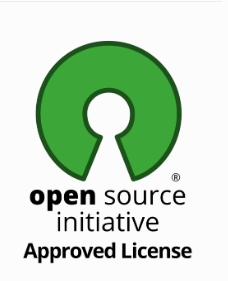

In [1]:
from IPython.display import Image

PATH = "/Users/surya/Desktop/Python/"
Image(filename = PATH + "OSI_Approved_License.png")